# Математическая модель Басса

$$\frac{f(t)}{1 - F(t)} = p + qF(t)$$
$$y\prime = f(x, y)$$

In [1]:
import matplotlib.pyplot as plt
from typing import Callable
import numpy as np
from scipy import integrate

In [2]:
def plot_solution(ax, sol_x, sol_y, xlabel="time", ylabel="Adopters", title='Lib Method'):
    ax.plot(sol_x, sol_y, color="red")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [3]:
def bass_model(t: float, F: float, p: float, q: float) -> float:
    """
    Calculates the Bass model function
    :param F: F(t) is the installed based fraction
    :param p: is the coefficient of the innovation
    :param q: is the coefficient of the imitation
    :return: f(t) is the rate of change of the installed model
    """
    return (p + q * F) * (1 - F)

In [4]:
def euler_method(f: Callable, t0: float, F0: float, n: int, dt: float = 1e-2, **kwargs) -> np.ndarray:
    vals = []
    t, F = t0, F0
    for _ in range(n):
        F += dt * f(t, F, **kwargs)
        t += dt
        vals.append((t, F))
    return np.array(vals)

In [5]:
Fs = euler_method(bass_model, 0, 0, 7000, p=.01, q=.1)
t, F = Fs[:, 0], Fs[:, 1]

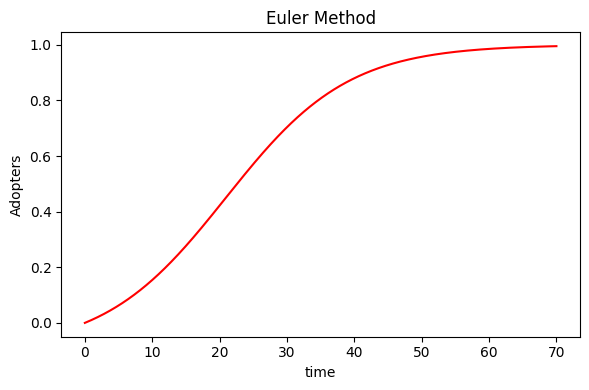

In [6]:
fig, ax = plt.subplots(figsize=(6, 4), layout="tight")
plot_solution(ax, t, F, title='Euler Method')

In [7]:
t_0, t_final = 0, 70
y_0 = [0]
p, q = .01, .1
def f(t: float, F: float):
    return bass_model(t, F, p=p, q=q)
solution = integrate.solve_ivp(f, (t_0, t_final), y_0, max_step=.01)
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  6.999e+01  7.000e+01]
        y: [[ 0.000e+00  1.000e-06 ...  9.950e-01  9.950e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 42014
     njev: 0
      nlu: 0


In [8]:
def plot_solution(ax, sol_x, sol_y, xlabel="time", ylabel="Adopters", title='Lib Method'):
    ax.plot(sol_x, sol_y, color="red")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

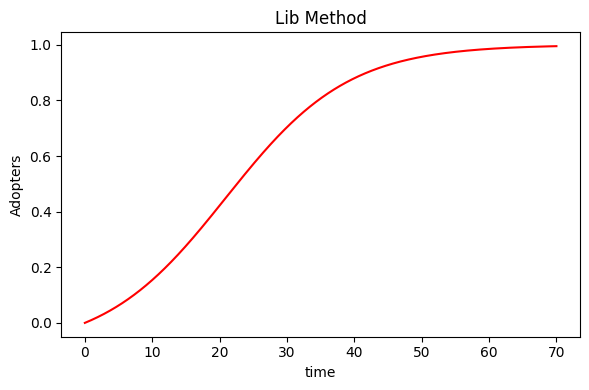

In [9]:
fig, ax = plt.subplots(figsize=(6, 4), layout="tight")
plot_solution(ax, solution.t, solution.y[0])